In [494]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
import warnings
warnings.filterwarnings('ignore')

In [496]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [497]:
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Data Visualization

<BarContainer object of 6 artists>

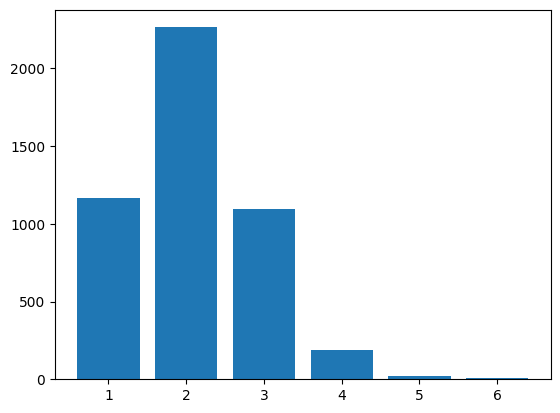

In [498]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

<BarContainer object of 615 artists>

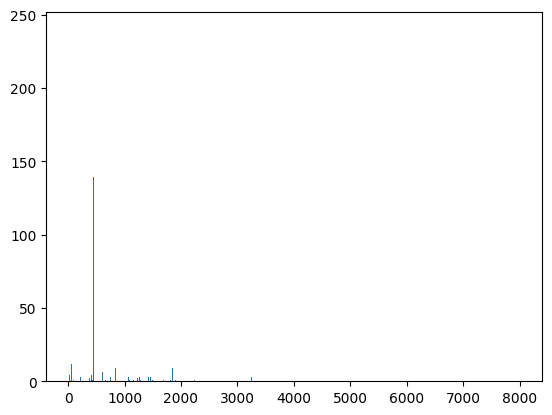

In [499]:
plt.bar(data['Size'].value_counts().index, data['Size'].value_counts().values)

<BarContainer object of 3 artists>

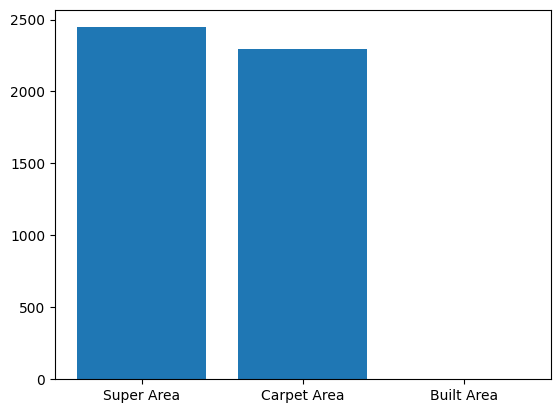

In [500]:
plt.bar(data['Area Type'].value_counts().index, data['Area Type'].value_counts().values)

<BarContainer object of 2235 artists>

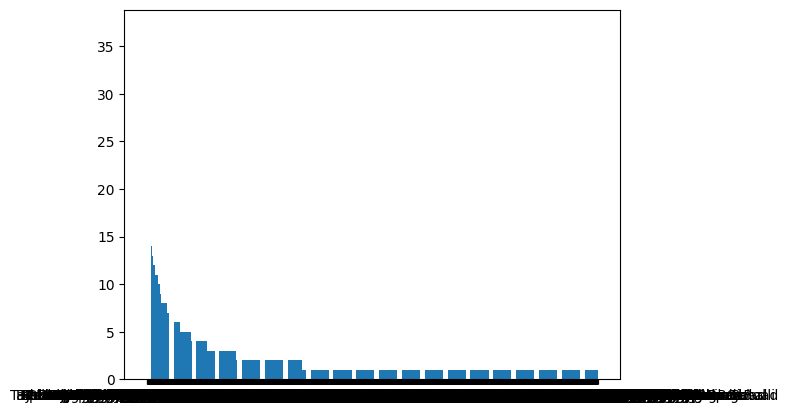

In [501]:
plt.bar(data['Area Locality'].value_counts().index, data['Area Locality'].value_counts().values)

<BarContainer object of 3 artists>

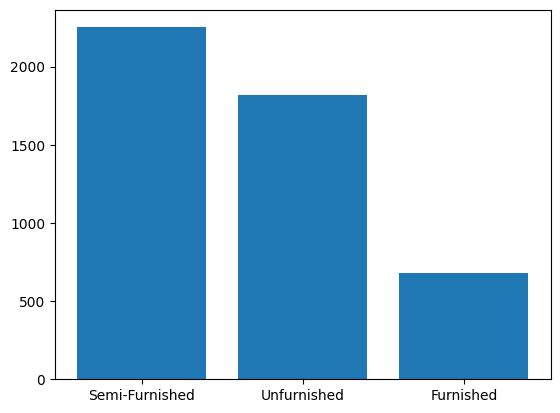

In [502]:
plt.bar(data['Furnishing Status'].value_counts().index, data['Furnishing Status'].value_counts().values)

<BarContainer object of 8 artists>

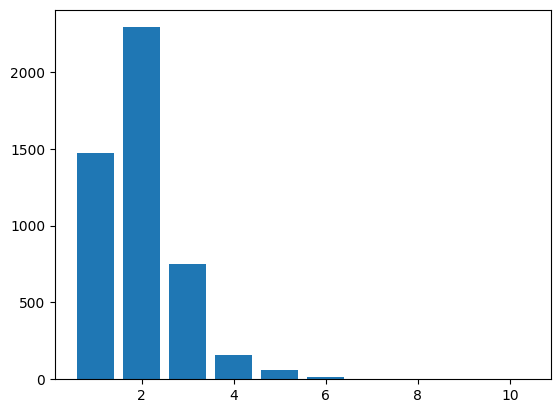

In [503]:
plt.bar(data['Bathroom'].value_counts().index, data['Bathroom'].value_counts().values)

In [504]:
data['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

## Preprocessing

### Adding of more features

In [505]:
data['Price_per_sqft'] = data['Rent'] / data['Size']

In [506]:
from datetime import datetime
# Assuming 'Posted On' contains the date strings in 'YYYY-MM-DD' format
date_format = '%Y-%m-%d'  # Corrected format string

# Convert the 'Posted On' column to datetime objects
data['Posted On'] = pd.to_datetime(data['Posted On'], format=date_format)

# Specify the target date
target_date = datetime(2023, 9, 5)

# Calculate the difference in days and store it in a new column
data['Days_since_posting'] = (target_date - data['Posted On']).dt.days

In [507]:
data = data[['Days_since_posting', 'BHK', 'Size', 'Price_per_sqft', 'Area Type', 'Furnishing Status', 'Bathroom', 'Rent']]

In [508]:
data.head(5)

,Days_since_posting,BHK,Size,Price_per_sqft,Area Type,Furnishing Status,Bathroom,Rent
0,475,2,1100,9.090909,Super Area,Unfurnished,2,10000
1,480,2,800,25.000000,Super Area,Semi-Furnished,1,20000
2,477,2,1000,17.000000,Super Area,Semi-Furnished,1,17000
3,428,2,800,12.500000,Super Area,Unfurnished,1,10000
4,484,2,850,8.823529,Carpet Area,Unfurnished,1,7500


### Conversion of Categorical Variable to One-Hot Encoding

In [509]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [510]:
#data = data[~data['Area Type'].str.contains('Built Area')]

In [511]:
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'Furnishing Status')

In [512]:
data.head(5)

,Days_since_posting,BHK,Size,Price_per_sqft,Bathroom,Rent,Carpet Area,Super Area,Semi-Furnished,Unfurnished
0,475,2,1100,9.090909,2,10000,False,True,False,True
1,480,2,800,25.000000,1,20000,False,True,True,False
2,477,2,1000,17.000000,1,17000,False,True,True,False
3,428,2,800,12.500000,1,10000,False,True,False,True
4,484,2,850,8.823529,1,7500,True,False,False,True


### Cleaning Outliers for Integer Data Type

In [513]:
columns_to_check = ['Days_since_posting', 'BHK', 'Size', 'Bathroom', 'Price_per_sqft'] 

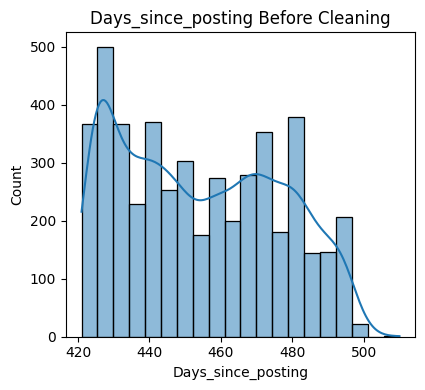

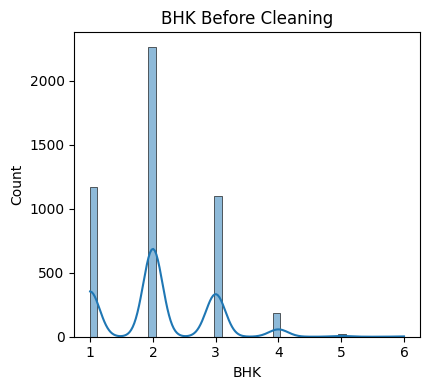

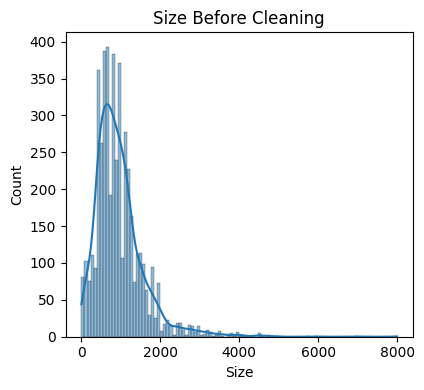

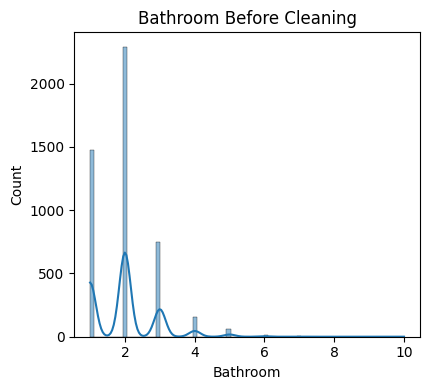

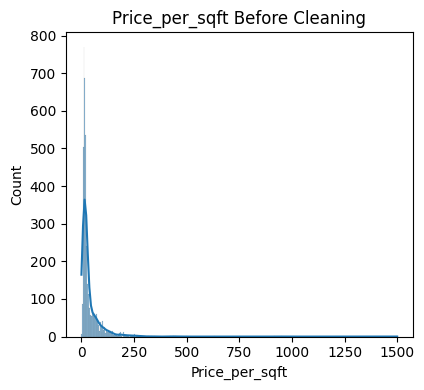

In [514]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'{column_name} Before Cleaning')

    plt.tight_layout()
    plt.show()

In [515]:

# Loop through the columns and apply the IQR-based outlier detection and removal
for column_name in columns_to_check:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[column_name] >= Q1 - 1.5*IQR) & (data[column_name] <= Q3 + 1.5*IQR)]

In [516]:
data.shape

(3906, 10)

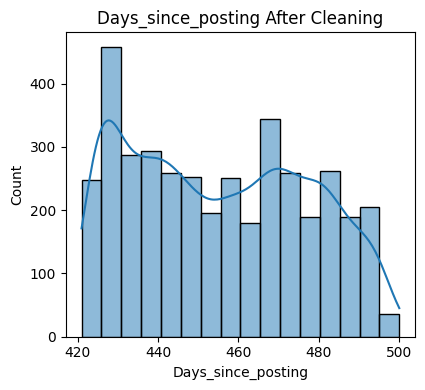

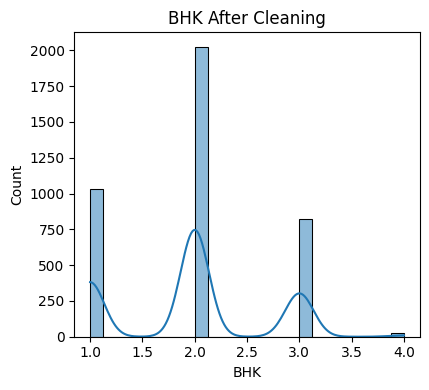

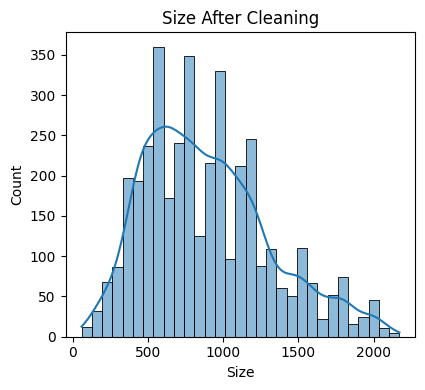

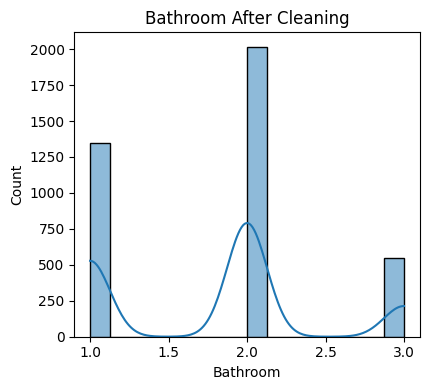

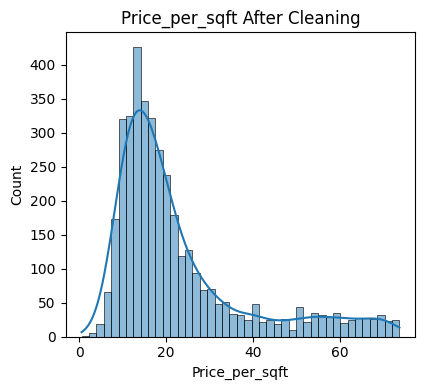

In [517]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'{column_name} After Cleaning')

    plt.tight_layout()
    plt.show()

### Training and Test Split

In [518]:
X = data.drop('Rent', axis=1)
y = data['Rent']

In [519]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardizing the Values

In [520]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [521]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ -113.44210354,  1195.14172045,  8549.67656703, 12051.12976508,
         131.81941049, -2536.92745983, -2620.00359198,  -218.66400841,
        -232.92222406])

## Evaluation

### Quantitative Evaluation

In [522]:
y_preds = model.predict(X_test)

In [523]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ -113.44210354  1195.14172045  8549.67656703 12051.12976508
   131.81941049 -2536.92745983 -2620.00359198  -218.66400841
  -232.92222406]
Mean squared error: 31116477.53
Coefficient of determination: 0.87


### Qualitative Evaluation

In [524]:
sample_data = X.iloc[4]
sample_data

Days_since_posting         484
BHK                          2
Size                       850
Price_per_sqft        8.823529
Bathroom                     1
Carpet Area               True
Super Area               False
Semi-Furnished           False
Unfurnished               True
Name: 4, dtype: object

In [525]:
sample_data_standardized = sc.transform(X.iloc[4].values.reshape(1,-1))

In [526]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

7160.123966323137

In [527]:
y.iloc[4]

7500

## Simple Linear Regression Model

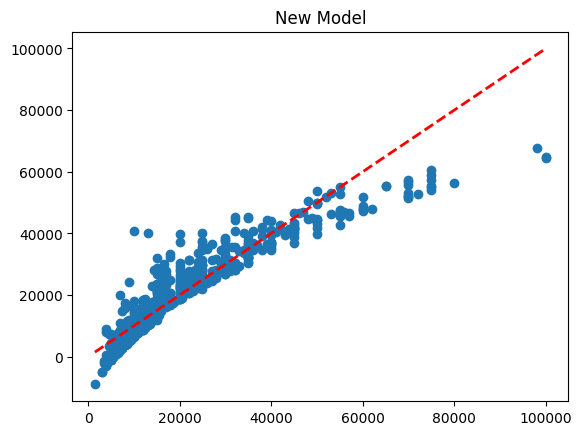

In [528]:
plt.scatter(y_test, y_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("New Model")
plt.savefig("linear_regression_plot.png")
plt.show()

In [529]:
data

,Days_since_posting,BHK,Size,Price_per_sqft,Bathroom,Rent,Carpet Area,Super Area,Semi-Furnished,Unfurnished
0,475,2,1100,9.090909,2,10000,False,True,False,True
1,480,2,800,25.000000,1,20000,False,True,True,False
2,477,2,1000,17.000000,1,17000,False,True,True,False
3,428,2,800,12.500000,1,10000,False,True,False,True
4,484,2,850,8.823529,1,7500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4741,475,2,1000,15.000000,2,15000,True,False,True,False
4742,478,3,2000,14.500000,3,29000,False,True,True,False
4743,422,3,1750,20.000000,3,35000,True,False,True,False
4744,426,3,1500,30.000000,2,45000,True,False,True,False
